In [348]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

In [349]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\train.csv")

In [350]:
df = pd.DataFrame(df)

In [351]:
df.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [353]:
df = df.drop(["id"], axis=1)

In [354]:
pd.set_option('display.max_rows', None)

In [355]:
def describepro(df, togroup):
    lst = []
    count = -1
    for c in range(len(df.columns)):
        lst.append(pd.DataFrame())
    for i in df.columns:
        y = df.groupby(togroup)[i].describe().T
        y["column"] = i
        count += 1
        lst[count] = y
    return lst

In [356]:
describepro(df, "age")[4]

age,adult,young,column
count,1160.000000,75.00000,pulse
mean,77.503448,111.60000,pulse
std,27.291922,36.83528,pulse
min,30.000000,40.00000,pulse
25%,52.000000,84.00000,pulse
50%,72.000000,114.00000,pulse
75%,96.000000,130.50000,pulse
max,184.000000,184.00000,pulse


In [357]:
cross_tab = pd.crosstab([df['total_protein']], [df["surgery"], df['outcome']])

In [358]:
cross_tab

surgery         no                   yes                 
outcome       died euthanized lived died euthanized lived
total_protein                                            
3.5              0          0     0    2          0     0
3.7              0          0     0    0          0     1
3.9              0          1     0    0          0     1
4.0              0          0     0    3          1     1
4.3              0          0     0    1          0     1
4.5              1          0     1    8          1     4
4.6              0          0     0    3          0     1
4.7              0          0     0    3          0     0
4.9              0          0     0    5          1     0
5.0              0          0     0    0          0     1
5.3              0          0     2    1          0     1
5.5              2          0     1    3          0     2
5.7              3          0     1    1          1     1
5.8              0          0     0    2          0     0
5.9              0          1     5    3          1     5
6.0              1          5     8   12          4    34
6.1              1          1     1   14          1    11
6.2              1          2     4    6          0     7
6.3              0          0     0    2          0     6
6.4              2          0     1    7          0     5
6.5              1          1    15   29          5    17
6.6              4          0    16   24          5    18
6.7              2          2     0    6          0     5
6.8              3          0     4    6          0     2
6.9              0          0     1    2          0     1
7.0              3          4    18   12          5    35
7.1              0          0     1    1          0     1
7.2              4          0    19   25          1    14
7.3              1          0     5    2          1     0
7.4              3          1     1   10          1     8
7.5             12          5    26   56          6    30
7.6              5          2     3   11          0     7
7.7              0          0     2    5          0     2
7.8              1          0     1    5          0     4
7.9              1          0     0    0          0     0
8.0              2          2     6    9          2    14
8.1             11         11    13   14          3    12
8.2              4          6     3    1          1     1
8.3              0          0     1    1          1     0
8.4              0          1     0    2          1     2
8.5              2          2     7    5          0     4
8.6              1          1     3    8          1     5
8.7              1          0     0    1          1     0
8.8              0          0     0    2          1     1
8.9              0          0     0    4          0     3
9.0              0          0     2    1          0     0
9.1              0          0     2    2          0     1
10.2             0          1     0    1          1     1
11.0             1          0     0    2          0     0
11.2             0          0     0    0          0     1
13.0             0          1     1    2         11     5
46.0             0          0     0    1          1     1
50.0             0          0     0    0          2     1
51.0             0          4     1    0          1     3
53.0             0          0     2    0          2     1
54.0             0          0     0    1          0     3
55.0             0          2     0    0          1     1
56.0             0          1     0    0          1     3
57.0             0          0     0    0          2     0
58.0             0          0     0    1          0     0
60.0             0          2     0    1          3     4
61.0             0          0     2    0          0     2
62.0             0          0     1    0          4     1
63.0             0          0     1    0          0     0
64.0             0          1     2    1         13     8
65.0             0          2     3    0          7     

In [359]:
pd.set_option('display.max_rows', 10)

In [360]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [361]:
df.groupby("age")["respiratory_rate"].unique().tolist()

[array([24., 12., 28., 30., 48., 32., 16., 36., 88., 40., 96., 20., 68.,
        18., 14., 35., 51., 21., 84., 50.,  9., 80., 44.,  8., 42., 90.,
        60., 58., 22., 25., 10., 26., 66., 52., 23.]),
 array([20., 36., 13., 24., 28., 48., 51., 84., 68., 40., 18., 21., 12.,
        30., 70., 96., 80., 60., 14.])]

In [362]:
binsforresp = [8, 16, 23, 32, 40, 50, 58, 64, 76, 84, 100]
labelsforresp = [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10]
df["resp_rate_cat"] = pd.cut(df["respiratory_rate"], bins=binsforresp, labels=labelsforresp, right=True, include_lowest=True)
df = df.drop("respiratory_rate", axis=1)


In [363]:
df.groupby("age")["rectal_temp"].unique().tolist()

[array([38.1, 37.5, 38.3, 37.1, 38. , 39.2, 37.4, 39.3, 37.8, 38.8, 37.6,
        39.1, 39.4, 38.5, 37.2, 38.2, 38.4, 37.7, 36.1, 38.6, 38.7, 40.3,
        37.9, 38.9, 36.5, 37.3, 39.5, 36.8, 36. , 35.4, 39. , 39.6, 36.4,
        39.8, 40.8, 37. , 39.7, 36.6, 36.7, 36.9, 39.9, 36.2, 40. ]),
 array([38.7, 40.3, 37.5, 39.2, 37.2, 38.2, 38.1, 39.1, 38.4, 38. , 38.6,
        38.9, 37.8, 38.3, 39.4, 38.8, 37.4, 37. , 37.1, 37.6, 39.8, 38.5,
        39. , 36.4, 39.3, 36.1])]

In [364]:
binsfortemp = [35, 36, 37.5, 38.6, 39.5, 40.5, 41]
labelsfortemp = [1, 2, 3, 4, 5, 6]
df["rectal_temp_cat"] = pd.cut(df["rectal_temp"], bins=binsfortemp, labels=labelsfortemp, right=True, include_lowest=True)
df = df.drop("rectal_temp", axis=1)

In [365]:
df.packed_cell_volume.unique()

array([57. , 33. , 37. , 53. , 47. , 49. , 43. , 40. , 46. , 65. , 44. ,
       60. , 39. , 52. , 72. , 35. , 66. , 34. , 45. , 59. , 48. , 73. ,
       31.5, 54. , 30. , 55. , 64. , 50. , 69. , 36. , 42. , 68. , 41. ,
       75. , 38. , 51. , 37.5, 23. , 63. , 26. , 28. , 71. , 58. , 56. ,
       32. , 31. , 74. , 67. , 70. ])

In [366]:
binsforvolume = [20, 28, 37, 42, 48, 58, 66, 80]
labelsforvolume = [1, 2, 3, 4, 5, 6, 7]
df["packed_cell_volume_cat"] = pd.cut(df["packed_cell_volume"], bins=binsforvolume, labels=labelsforvolume, right=True, include_lowest=True)
df = df.drop("packed_cell_volume", axis=1)

In [367]:
binsforprotein = [0, 5.9, 7.4, 10, 20, 35, 67, 90]
labelsforprotein = [1, 2, 3, 4, 5, 6, 7]
df["totalprotein_cat"] = pd.cut(df["total_protein"], bins=binsforprotein, labels=labelsforprotein, right=True, include_lowest=True)
df = df.drop("total_protein", axis=1)

In [368]:
df

,surgery,age,hospital_number,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,...,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,resp_rate_cat,rectal_temp_cat,packed_cell_volume_cat,totalprotein_cat
0,yes,adult,530001,132.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,...,yes,2209,0,0,no,died,3,3,5,3
1,yes,adult,533836,88.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,...,yes,2208,0,0,no,euthanized,1,2,2,6
2,yes,adult,529812,120.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,...,yes,5124,0,0,no,lived,3,3,2,2
3,yes,adult,5262541,72.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,...,yes,2208,0,0,yes,lived,3,2,5,2
4,no,adult,5299629,52.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,...,no,0,0,0,yes,lived,5,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,129.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,...,yes,2206,0,0,no,lived,5,3,5,6
1231,yes,adult,528570,60.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,...,yes,2209,0,0,yes,died,5,2,2,2
1232,yes,young,529685,84.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,...,yes,400,0,0,yes,lived,4,2,3,1
1233,yes,adult,534784,70.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,...,yes,2209,0,0,no,lived,1,3,5,7


In [369]:
df.shape

(1235, 28)

In [370]:
df.hospital_number.nunique()

255

In [371]:
df.outcome.value_counts().keys().tolist()

['lived', 'died', 'euthanized']

In [372]:
df.outcome.value_counts(normalize=True)

outcome
lived         0.464777
died          0.331984
euthanized    0.203239
Name: proportion, dtype: float64

In [373]:
outcome = {
    "died": -1,
    "euthanized": 0,
    "lived": 1
}
df.outcome = df.outcome.map(outcome)

In [374]:
df.outcome

0      -1
1       0
2       1
3       1
4       1
       ..
1230    1
1231   -1
1232    1
1233    1
1234    1
Name: outcome, Length: 1235, dtype: int64

In [375]:
numeric = []
binary = []
categoric = []
for i in df.columns:
    if df[i].dtypes == "int64" and df[i].nunique() == 2 or df[i].dtypes == "float64" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "object" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(i)
    else: 
        categoric.append(i)

In [376]:
numeric = pd.DataFrame(df[numeric])
categoric = pd.DataFrame(df[categoric])
binary = pd.DataFrame(df[binary])

In [377]:
numeric.isnull().sum()

hospital_number          0
pulse                    0
nasogastric_reflux_ph    0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
outcome                  0
dtype: int64

In [378]:
categoric.isnull().sum()

temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
                          ..
abdomo_appearance         48
resp_rate_cat              0
rectal_temp_cat            0
packed_cell_volume_cat     0
totalprotein_cat           0
Length: 16, dtype: int64

In [379]:
for i in categoric.columns:
    categoric[i] = categoric[i].fillna(categoric[i].mode()[0])

In [380]:
categoric.isnull().sum()

temp_of_extremities       0
peripheral_pulse          0
mucous_membrane           0
capillary_refill_time     0
pain                      0
                         ..
abdomo_appearance         0
resp_rate_cat             0
rectal_temp_cat           0
packed_cell_volume_cat    0
totalprotein_cat          0
Length: 16, dtype: int64

In [381]:
binary.isnull().sum()

surgery            0
age                0
surgical_lesion    0
lesion_3           0
cp_data            0
dtype: int64

In [382]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,resp_rate_cat,rectal_temp_cat,packed_cell_volume_cat,totalprotein_cat
0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,3,3,5,3
1,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,1,2,2,6
2,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,absent,distend_large,serosanguious,3,3,2,2
3,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,3,2,5,2
4,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,5,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,absent,distend_large,serosanguious,5,3,5,6
1231,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,5,2,2,2
1232,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,4,2,3,1
1233,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,1,3,5,7


In [383]:
categoric.peristalsis.unique()

array(['absent', 'hypomotile', 'normal', 'hypermotile', 'distend_small'],
      dtype=object)

In [384]:
peris = {
    "normal": 1,
    "absent": 0,
    "hypomotile": 2,
    "hypermotile": 4, 
    "distend_small": 3
}
categoric.peristalsis = categoric.peristalsis.map(peris)


In [385]:
numeric = pd.concat([numeric, categoric[["packed_cell_volume_cat","rectal_temp_cat", "resp_rate_cat", "totalprotein_cat"]]], axis=1)

In [386]:
numeric = pd.concat([numeric, categoric["peristalsis"]], axis=1)
categoric = categoric.drop("peristalsis", axis=1)

<Axes: >

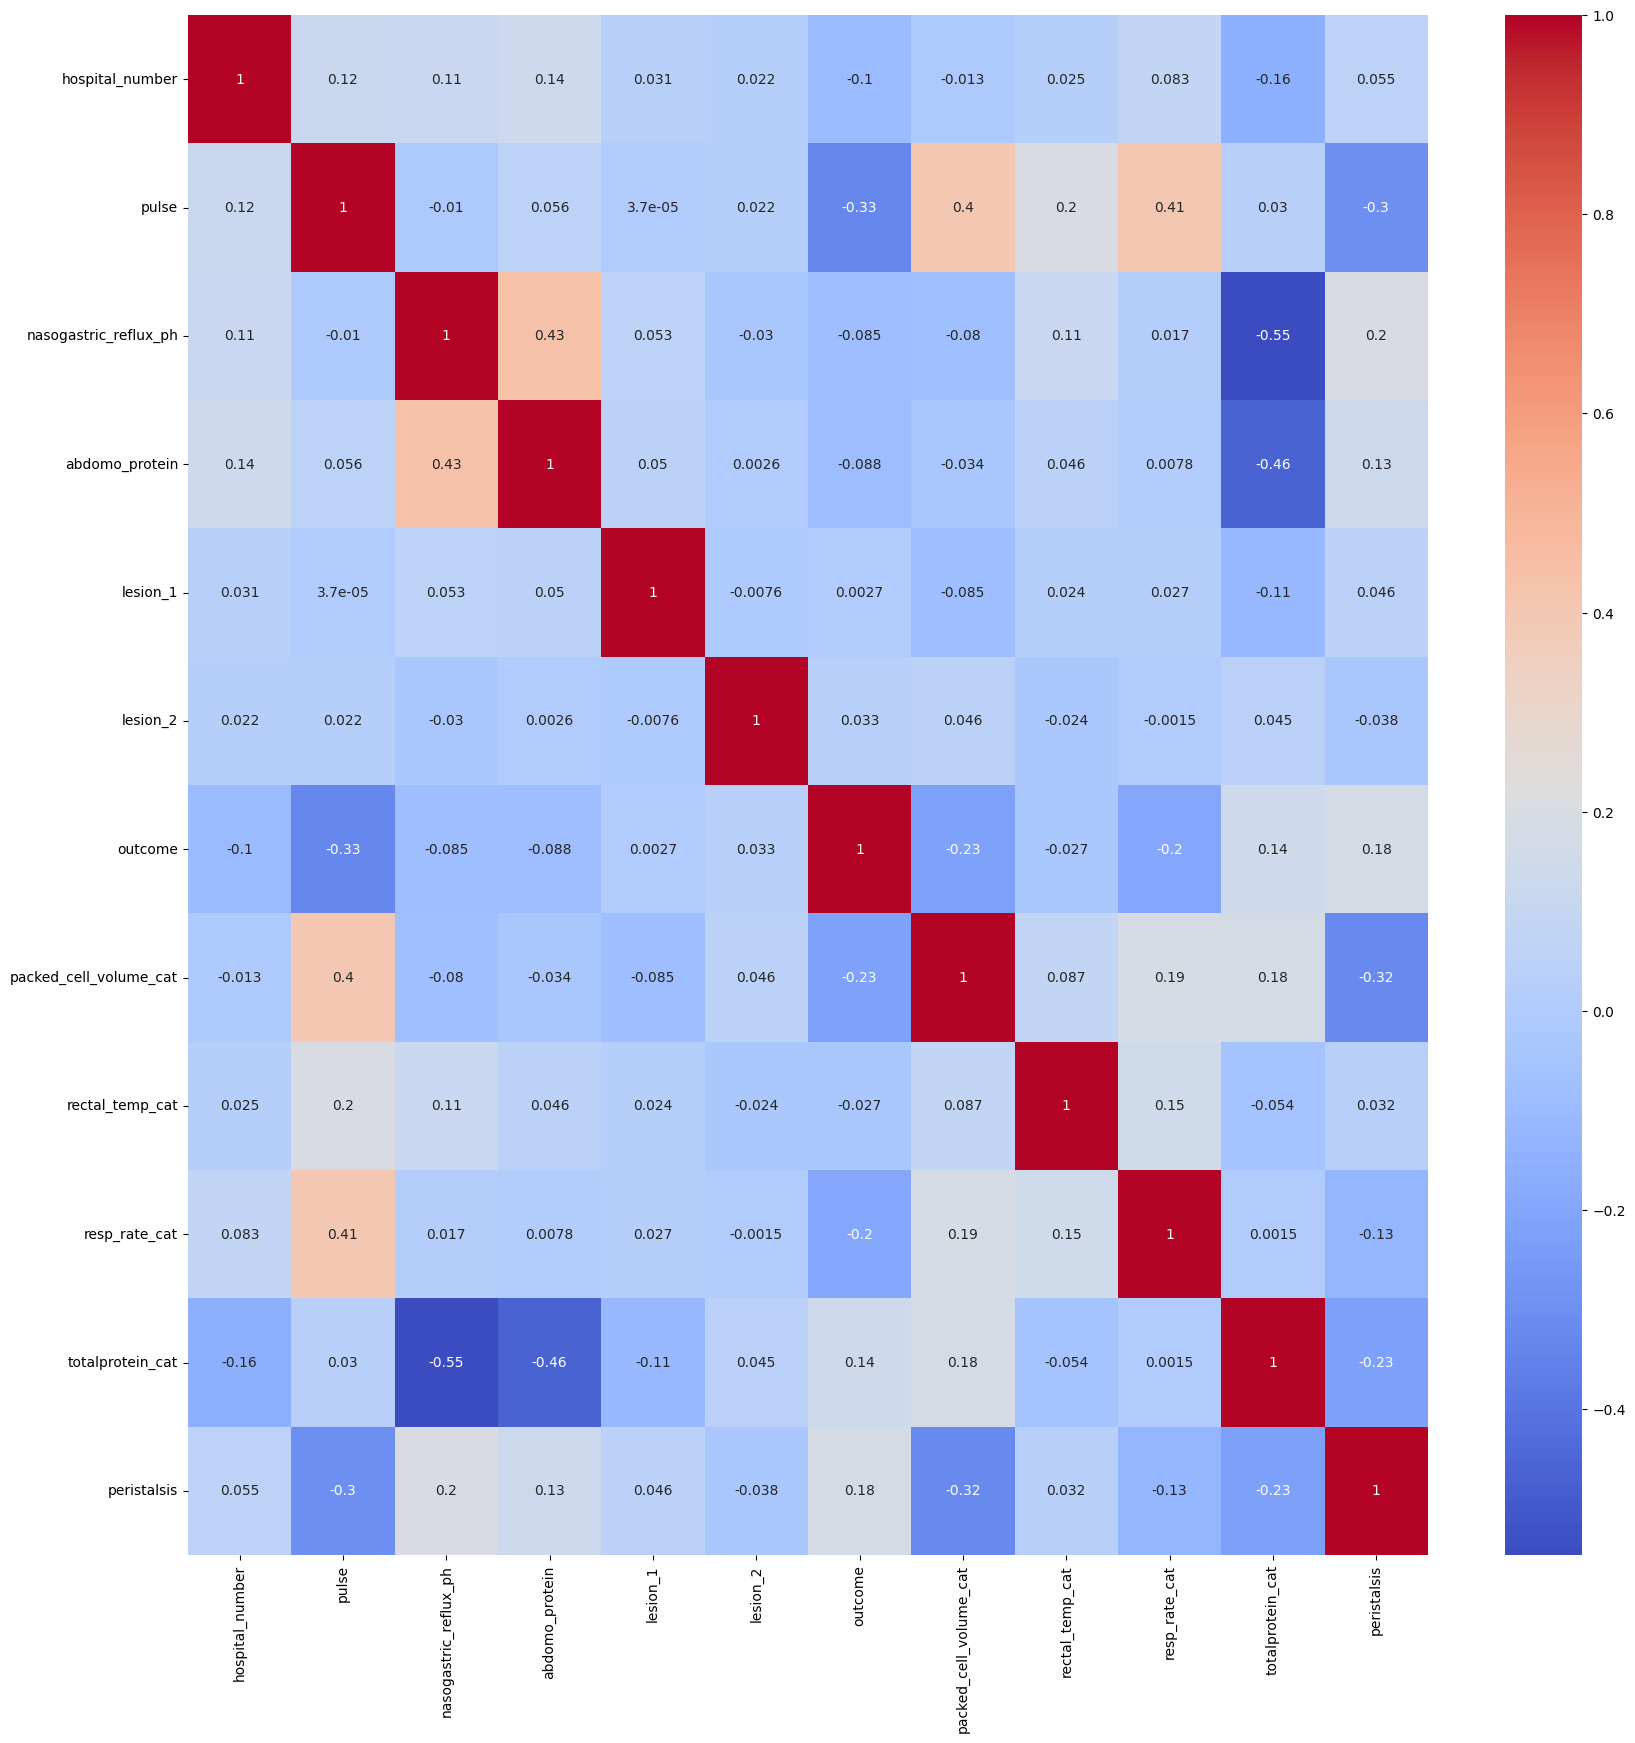

In [387]:
corr = numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [388]:
numeric

,hospital_number,pulse,nasogastric_reflux_ph,abdomo_protein,lesion_1,lesion_2,outcome,packed_cell_volume_cat,rectal_temp_cat,resp_rate_cat,totalprotein_cat,peristalsis
0,530001,132.0,6.5,3.4,2209,0,-1,5,3,3,3,0
1,533836,88.0,2.0,2.0,2208,0,0,2,2,1,6,0
2,529812,120.0,3.5,3.4,5124,0,1,2,3,3,2,2
3,5262541,72.0,2.0,3.9,2208,0,1,5,2,3,2,2
4,5299629,52.0,7.0,2.6,0,0,1,4,3,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,129.0,2.0,2.0,2206,0,1,5,3,5,6,0
1231,528570,60.0,3.0,3.6,2209,0,-1,2,2,5,2,2
1232,529685,84.0,3.0,7.0,400,0,1,3,2,4,1,2
1233,534784,70.0,2.0,2.0,2209,0,1,5,3,1,7,2


In [389]:
binary

,surgery,age,surgical_lesion,lesion_3,cp_data
0,yes,adult,yes,0,no
1,yes,adult,yes,0,no
2,yes,adult,yes,0,no
3,yes,adult,yes,0,yes
4,no,adult,no,0,yes
...,...,...,...,...,...
1230,yes,adult,yes,0,no
1231,yes,adult,yes,0,yes
1232,yes,young,yes,0,yes
1233,yes,adult,yes,0,no


stat=31.655, p=0.000
Significant


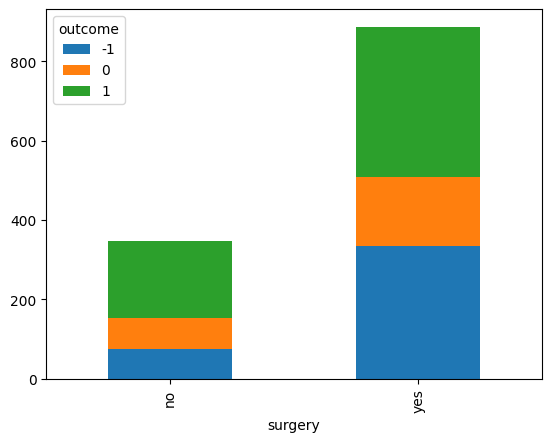

stat=55.361, p=0.000
Significant


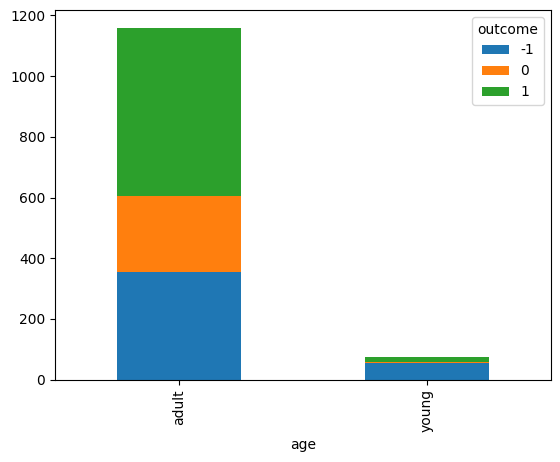

stat=90.212, p=0.000
Significant


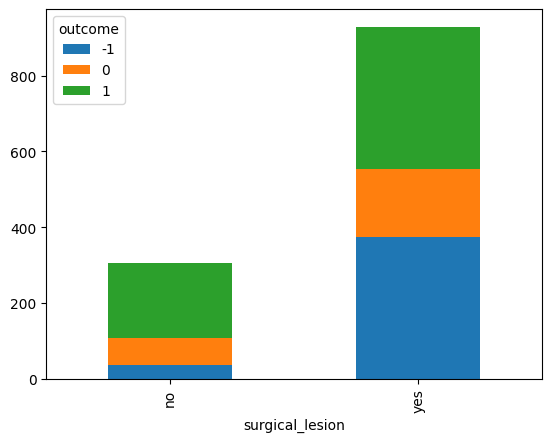

stat=1.538, p=0.463
Not significant


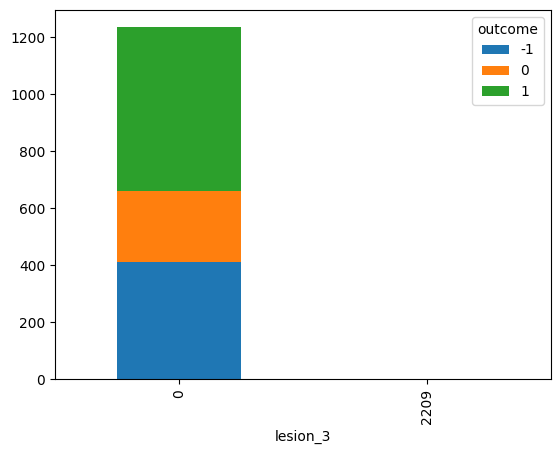

stat=79.910, p=0.000
Significant


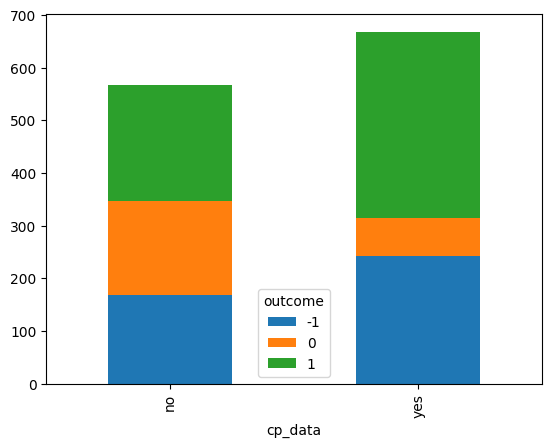

['surgery', 'age', 'surgical_lesion', 'cp_data']

In [390]:
columns = []
significant = []
for i in binary.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])
    stat, p, dof, expected = stats.chi2_contingency(crosstable)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Not significant')
    else:
        print('Significant')
        significant.append(i)

    for b in range(0, 2): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns
significant

stat=138.372, p=0.000
Significant


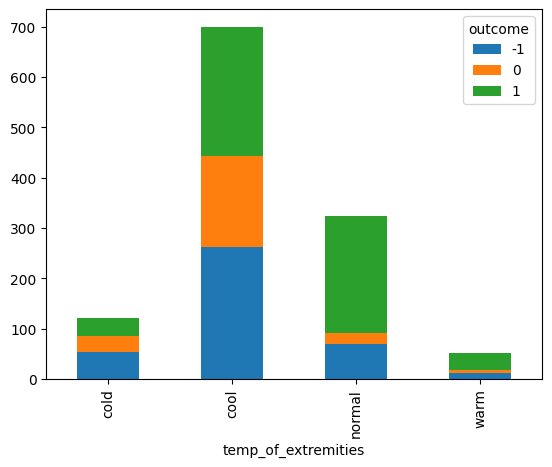

stat=152.700, p=0.000
Significant


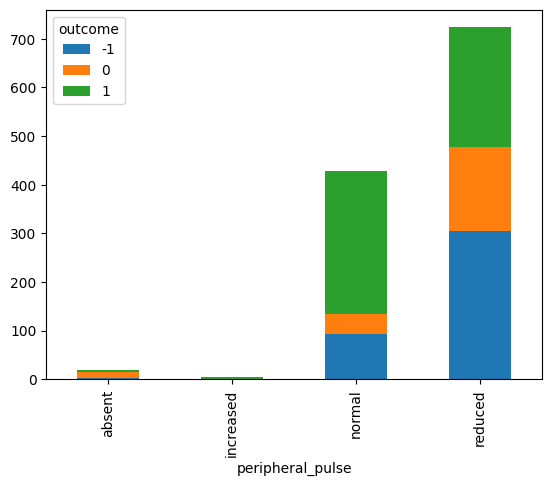

stat=163.831, p=0.000
Significant


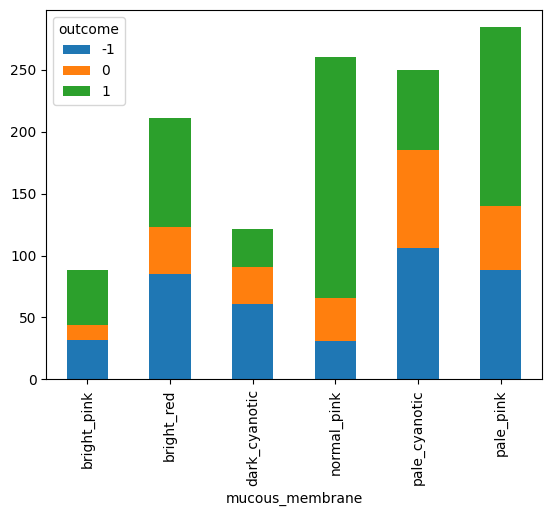

stat=112.127, p=0.000
Significant


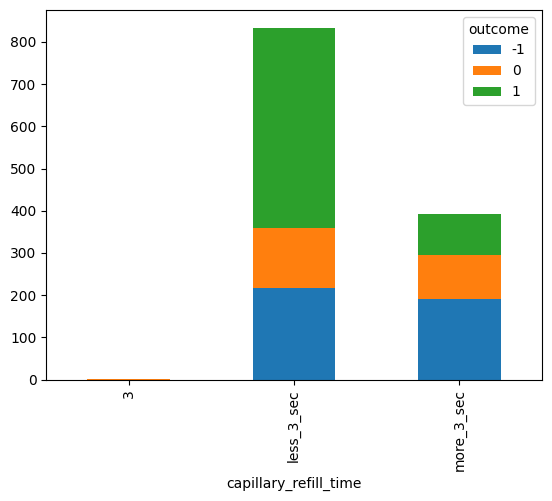

stat=313.950, p=0.000
Significant


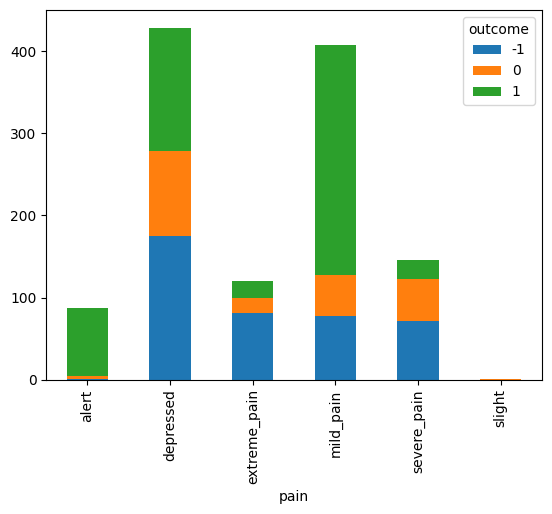

stat=132.402, p=0.000
Significant


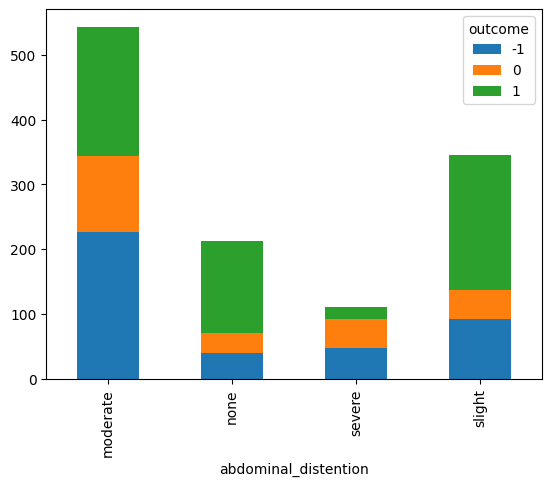

stat=31.321, p=0.000
Significant


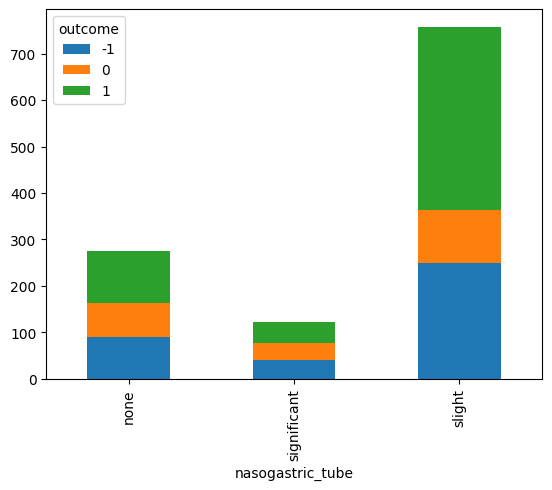

stat=40.321, p=0.000
Significant


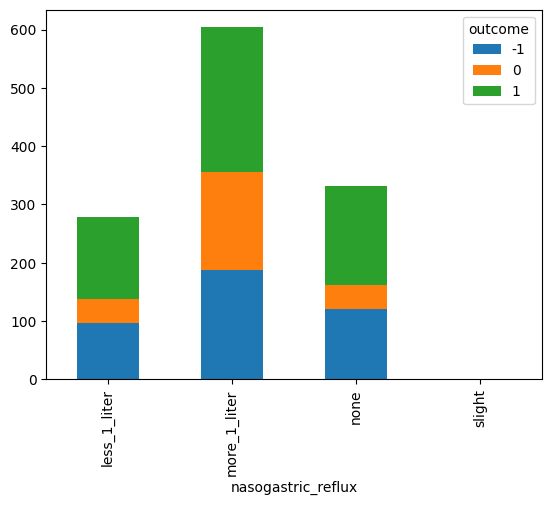

stat=61.710, p=0.000
Significant


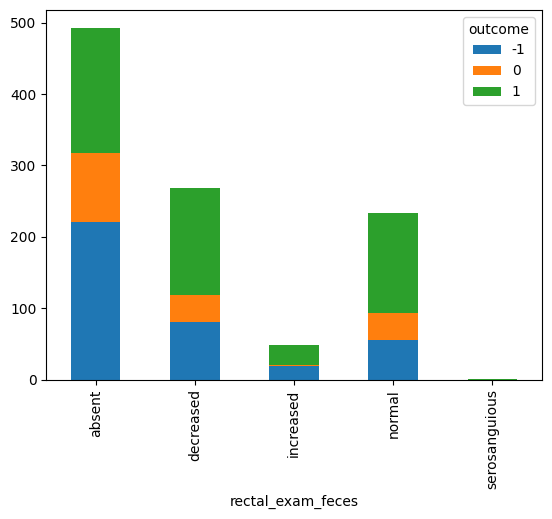

stat=81.911, p=0.000
Significant


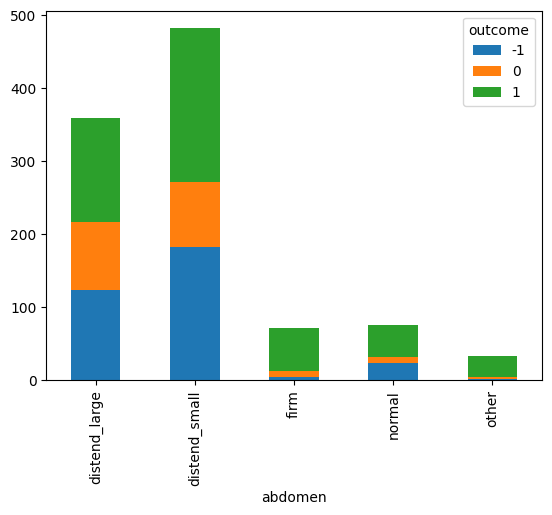

stat=160.995, p=0.000
Significant


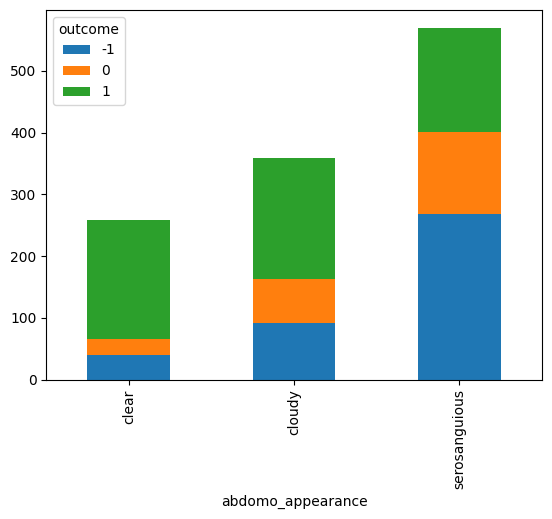

stat=111.486, p=0.000
Significant


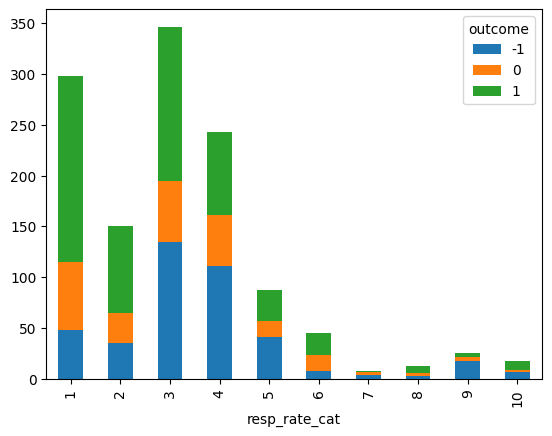

stat=44.199, p=0.000
Significant


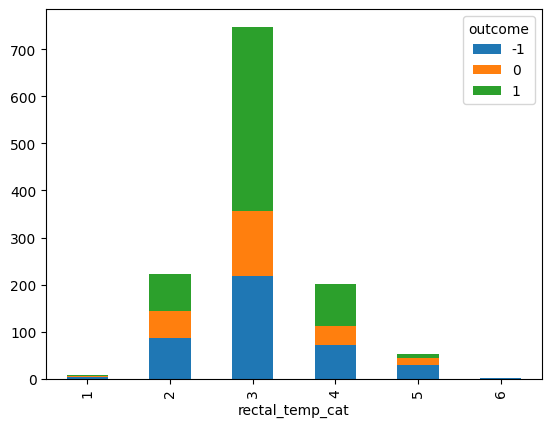

stat=165.907, p=0.000
Significant


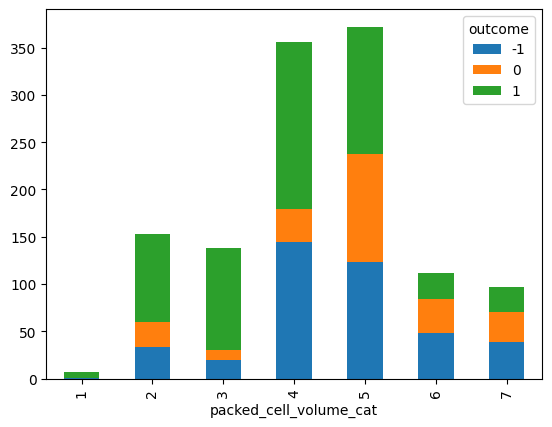

stat=312.205, p=0.000
Significant


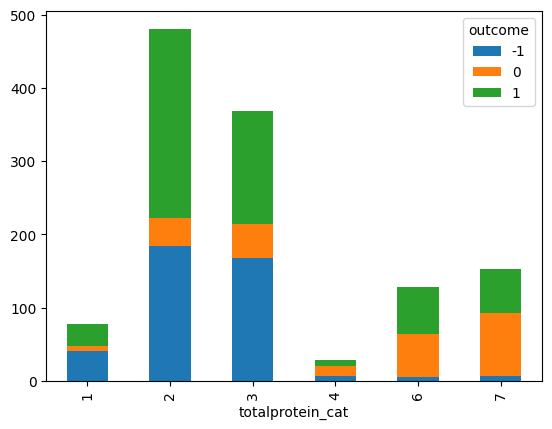

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'resp_rate_cat',
 'rectal_temp_cat',
 'packed_cell_volume_cat',
 'totalprotein_cat']

In [391]:
columns2 = []
significant2 = []
for i in categoric.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])
    stat, p, dof, expected = stats.chi2_contingency(crosstable)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Not significant')
    else:
        print('Significant')
        significant2.append(i)
    
    for b in range(len(crosstable[0])): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns2.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns2
significant2

In [392]:
binary = binary[significant]
categoric = categoric[significant2]

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

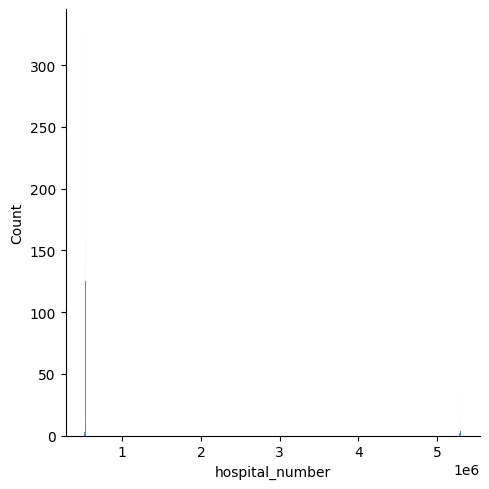

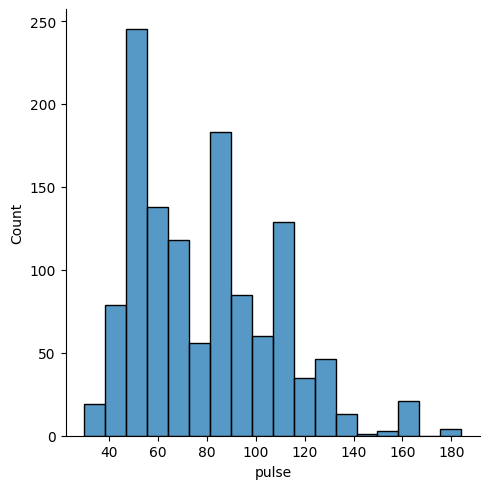

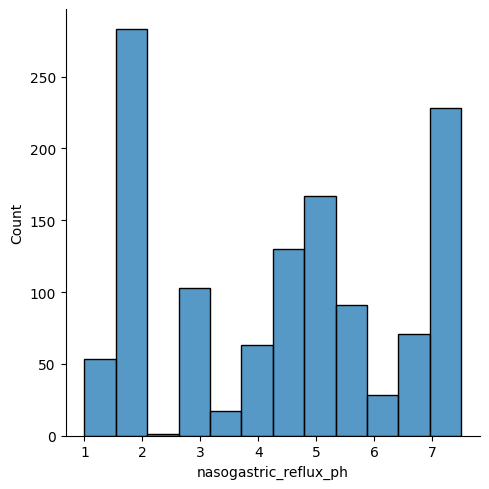

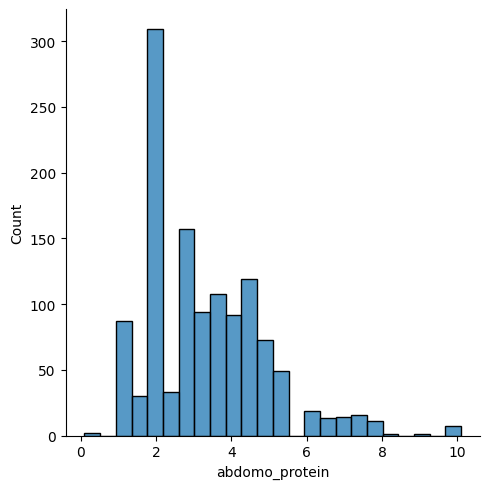

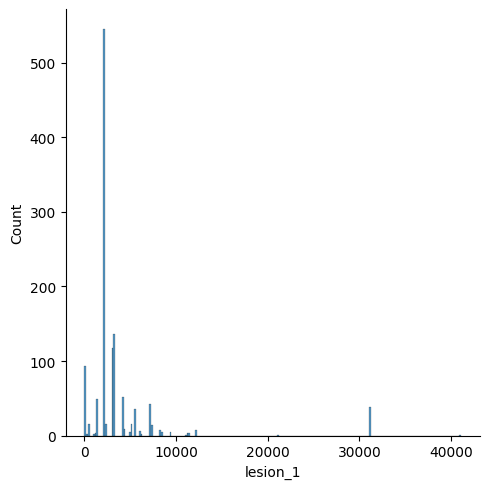

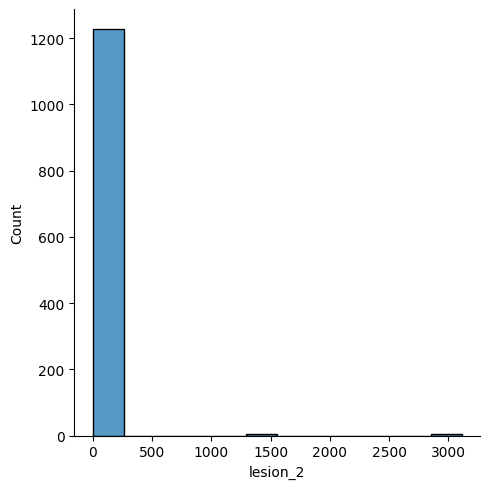

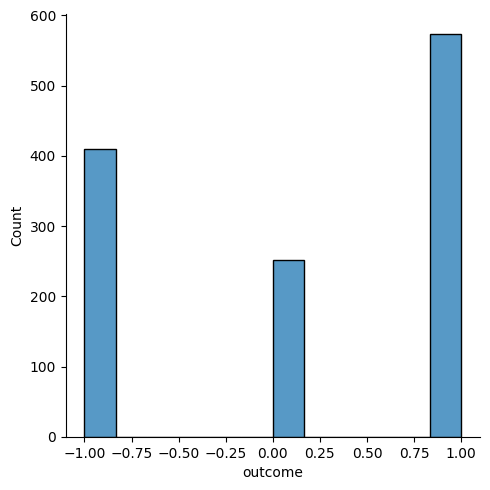

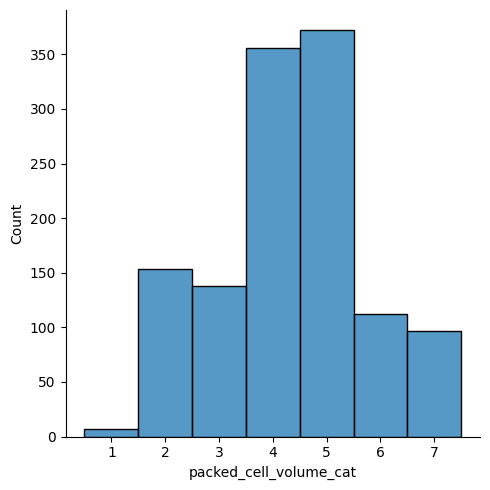

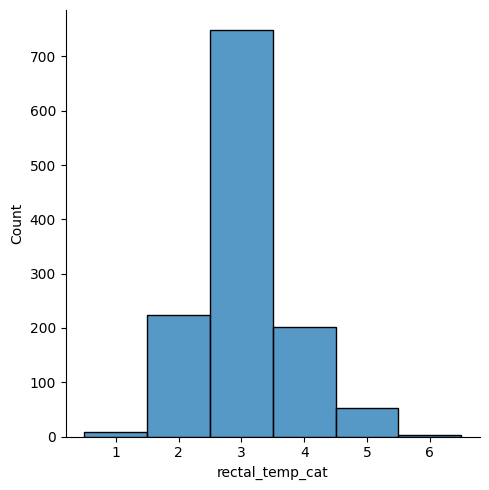

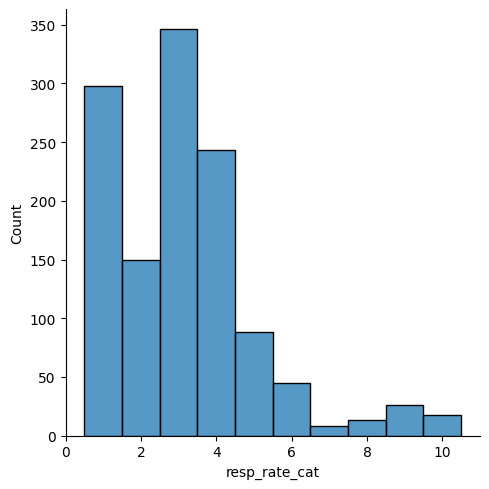

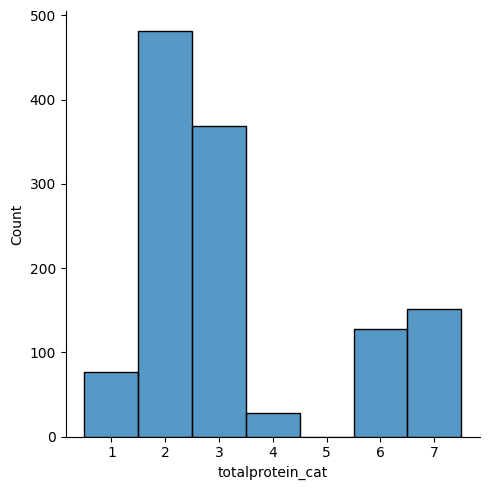

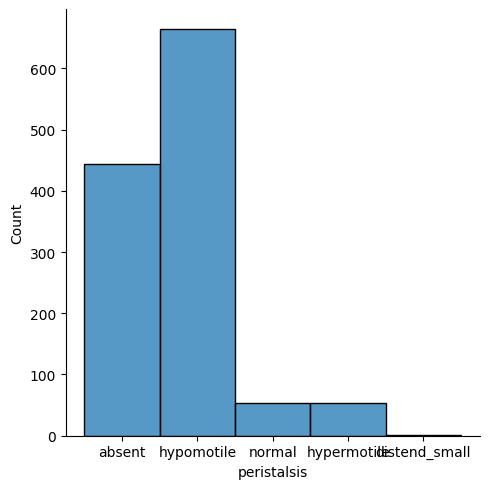

In [393]:
for i in numeric.columns:
    sns.displot(df[i], kind="hist")

In [394]:
binary

,surgery,age,surgical_lesion,cp_data
0,yes,adult,yes,no
1,yes,adult,yes,no
2,yes,adult,yes,no
3,yes,adult,yes,yes
4,no,adult,no,yes
...,...,...,...,...
1230,yes,adult,yes,no
1231,yes,adult,yes,yes
1232,yes,young,yes,yes
1233,yes,adult,yes,no


In [395]:
surgery = {"yes": 1, "no": 0}
age = {"adult": 1, "young":0}
lesion = {"yes": 1, "no": 0}
cp = {"yes": 1, "no": 0}
binary.surgery = binary.surgery.map(surgery)
binary.age = binary.age.map(age)
binary.surgical_lesion = binary.surgical_lesion.map(lesion)
binary.cp_data = binary.cp_data.map(cp)

C:\Users\Aleyna\AppData\Local\Temp\ipykernel_21032\3791519304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary.surgery = binary.surgery.map(surgery)
C:\Users\Aleyna\AppData\Local\Temp\ipykernel_21032\3791519304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary.age = binary.age.map(age)
C:\Users\Aleyna\AppData\Local\Temp\ipykernel_21032\3791519304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [396]:
binary

,surgery,age,surgical_lesion,cp_data
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,1
4,0,1,0,1
...,...,...,...,...
1230,1,1,1,0
1231,1,1,1,1
1232,1,0,1,1
1233,1,1,1,0


In [397]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,resp_rate_cat,rectal_temp_cat,packed_cell_volume_cat,totalprotein_cat
0,cool,reduced,dark_cyanotic,more_3_sec,depressed,slight,slight,less_1_liter,decreased,distend_small,serosanguious,3,3,5,3
1,cool,normal,pale_cyanotic,more_3_sec,mild_pain,moderate,none,more_1_liter,absent,distend_small,serosanguious,1,2,2,6
2,cool,reduced,pale_pink,less_3_sec,extreme_pain,moderate,slight,none,absent,distend_large,serosanguious,3,3,2,2
3,cold,reduced,pale_pink,more_3_sec,mild_pain,moderate,slight,more_1_liter,decreased,distend_small,cloudy,3,2,5,2
4,normal,normal,normal_pink,less_3_sec,alert,none,slight,less_1_liter,normal,normal,cloudy,5,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,cool,reduced,pale_pink,more_3_sec,depressed,moderate,none,more_1_liter,absent,distend_large,serosanguious,5,3,5,6
1231,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,slight,slight,none,decreased,distend_small,serosanguious,5,2,2,2
1232,normal,reduced,normal_pink,less_3_sec,mild_pain,slight,slight,none,increased,firm,cloudy,4,2,3,1
1233,normal,reduced,bright_red,less_3_sec,mild_pain,slight,none,more_1_liter,absent,distend_small,cloudy,1,3,5,7


In [398]:
categoric.rectal_exam_feces.unique()

array(['decreased', 'absent', 'normal', 'increased', 'serosanguious'],
      dtype=object)

In [399]:
categoric = categoric.drop(["packed_cell_volume_cat","rectal_temp_cat", "resp_rate_cat", "totalprotein_cat"], axis=1)

In [400]:
ordinal = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]

In [401]:
ordinal = categoric[ordinal]

In [402]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [403]:
ordi = OrdinalEncoder(categories=[['cold','cool','normal', 'warm'], ["absent","reduced", 'normal', 'increased'], [ 'less_3_sec', "3", "more_3_sec"], ['none', 'slight', 'moderate', 'severe'], ['slight', 'none', 'significant'], ['absent', 'normal','decreased','increased', 'serosanguious']])
ordi.fit(ordinal)
ordinal = ordi.transform(ordinal)
ordinal = pd.DataFrame(ordinal)

In [404]:
ordinal.columns = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]
ordinal

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces
0,1.0,1.0,2.0,1.0,0.0,2.0
1,1.0,2.0,2.0,2.0,1.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0
3,0.0,1.0,2.0,2.0,0.0,2.0
4,2.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0
1231,1.0,1.0,0.0,1.0,0.0,2.0
1232,2.0,1.0,0.0,1.0,0.0,3.0
1233,2.0,1.0,0.0,1.0,1.0,0.0


In [405]:
categoric = categoric.drop(["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"], axis=1)

In [406]:
categoric

,mucous_membrane,pain,nasogastric_reflux,abdomen,abdomo_appearance
0,dark_cyanotic,depressed,less_1_liter,distend_small,serosanguious
1,pale_cyanotic,mild_pain,more_1_liter,distend_small,serosanguious
2,pale_pink,extreme_pain,none,distend_large,serosanguious
3,pale_pink,mild_pain,more_1_liter,distend_small,cloudy
4,normal_pink,alert,less_1_liter,normal,cloudy
...,...,...,...,...,...
1230,pale_pink,depressed,more_1_liter,distend_large,serosanguious
1231,pale_cyanotic,mild_pain,none,distend_small,serosanguious
1232,normal_pink,mild_pain,none,firm,cloudy
1233,bright_red,mild_pain,more_1_liter,distend_small,cloudy


In [407]:
numeric

,hospital_number,pulse,nasogastric_reflux_ph,abdomo_protein,lesion_1,lesion_2,outcome,packed_cell_volume_cat,rectal_temp_cat,resp_rate_cat,totalprotein_cat,peristalsis
0,530001,132.0,6.5,3.4,2209,0,-1,5,3,3,3,0
1,533836,88.0,2.0,2.0,2208,0,0,2,2,1,6,0
2,529812,120.0,3.5,3.4,5124,0,1,2,3,3,2,2
3,5262541,72.0,2.0,3.9,2208,0,1,5,2,3,2,2
4,5299629,52.0,7.0,2.6,0,0,1,4,3,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,129.0,2.0,2.0,2206,0,1,5,3,5,6,0
1231,528570,60.0,3.0,3.6,2209,0,-1,2,2,5,2,2
1232,529685,84.0,3.0,7.0,400,0,1,3,2,4,1,2
1233,534784,70.0,2.0,2.0,2209,0,1,5,3,1,7,2


In [408]:
categoric

,mucous_membrane,pain,nasogastric_reflux,abdomen,abdomo_appearance
0,dark_cyanotic,depressed,less_1_liter,distend_small,serosanguious
1,pale_cyanotic,mild_pain,more_1_liter,distend_small,serosanguious
2,pale_pink,extreme_pain,none,distend_large,serosanguious
3,pale_pink,mild_pain,more_1_liter,distend_small,cloudy
4,normal_pink,alert,less_1_liter,normal,cloudy
...,...,...,...,...,...
1230,pale_pink,depressed,more_1_liter,distend_large,serosanguious
1231,pale_cyanotic,mild_pain,none,distend_small,serosanguious
1232,normal_pink,mild_pain,none,firm,cloudy
1233,bright_red,mild_pain,more_1_liter,distend_small,cloudy


In [409]:
onehot = OneHotEncoder(handle_unknown="ignore")
onehot.fit(categoric)
transformed = onehot.transform(categoric)
transformeddf = pd.DataFrame(transformed.toarray(), columns=onehot.get_feature_names_out(categoric.columns))

In [410]:
encodeddata  = pd.concat([ordinal,transformeddf, binary], axis=1)
encodeddata

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgery,age,surgical_lesion,cp_data
0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
1,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
3,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
4,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
1231,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
1232,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1
1233,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0


In [411]:
finaldf = pd.concat([encodeddata, numeric], axis=1)

In [412]:
finaldf

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,nasogastric_reflux_ph,abdomo_protein,lesion_1,lesion_2,outcome,packed_cell_volume_cat,rectal_temp_cat,resp_rate_cat,totalprotein_cat,peristalsis
0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,6.5,3.4,2209,0,-1,5,3,3,3,0
1,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2208,0,0,2,2,1,6,0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,3.4,5124,0,1,2,3,3,2,2
3,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,3.9,2208,0,1,5,2,3,2,2
4,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,7.0,2.6,0,0,1,4,3,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2206,0,1,5,3,5,6,0
1231,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,3.0,3.6,2209,0,-1,2,2,5,2,2
1232,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,3.0,7.0,400,0,1,3,2,4,1,2
1233,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,2209,0,1,5,3,1,7,2


In [413]:
X = finaldf.drop("outcome", axis=1)
y = finaldf.outcome
X = X.sort_index(axis=1)

In [414]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [415]:
rf  =RandomForestClassifier()
rf.fit(X,y)
result = permutation_importance(
    rf, X, y, n_repeats=20, random_state=42, n_jobs=2
)

In [416]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
importances

,abdomen_distend_large,peristalsis,pain_slight,pain_depressed,nasogastric_reflux_slight,nasogastric_reflux_more_1_liter,mucous_membrane_pale_pink,mucous_membrane_pale_cyanotic,mucous_membrane_dark_cyanotic,mucous_membrane_bright_pink,...,totalprotein_cat,abdominal_distention,packed_cell_volume_cat,surgical_lesion,abdomo_protein,lesion_1,hospital_number,pain_mild_pain,pulse,nasogastric_reflux_ph
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003239,0.008097,0.005668,0.008907,0.008907,0.010526,0.008097,0.031579,0.027530,0.028340
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005668,0.004858,0.006478,0.006478,0.008907,0.010526,0.013765,0.021053,0.021862,0.025911
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002429,0.008907,0.008907,0.008097,0.007287,0.010526,0.015385,0.023482,0.027530,0.025101
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.007287,0.004049,0.008097,0.007287,0.006478,0.006478,0.026721,0.024291,0.024291
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.008907,0.005668,0.007287,0.009717,0.006478,0.012146,0.028340,0.021053,0.021862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.004858,0.008097,0.005668,0.008907,0.009717,0.012146,0.021862,0.025911,0.017814
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006478,0.004049,0.006478,0.005668,0.007287,0.009717,0.011336,0.025101,0.024291,0.030769
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008097,0.004049,0.006478,0.009717,0.009717,0.013765,0.017004,0.023482,0.032389,0.033198
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006478,0.007287,0.008907,0.009717,0.006478,0.010526,0.006478,0.026721,0.017814,0.027530


<Axes: >

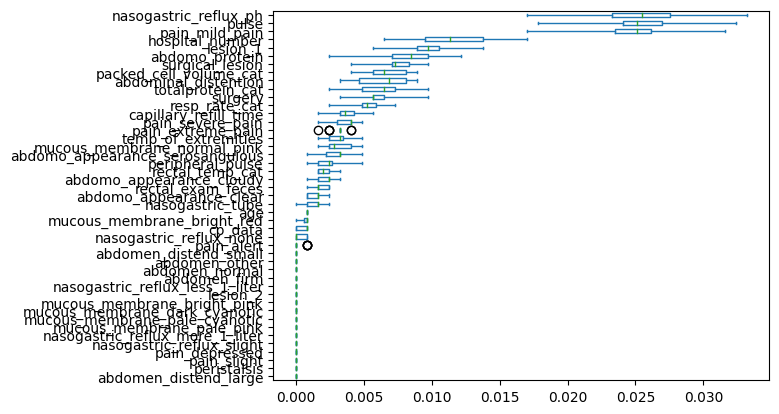

In [417]:
importances.plot.box(vert=False, whis=10)

In [418]:
features = []
for i in importances.columns:
    if importances[i].values.sum() < 0.01:
        features.append(i)
features

['abdomen_distend_large',
 'peristalsis',
 'pain_slight',
 'pain_depressed',
 'nasogastric_reflux_slight',
 'nasogastric_reflux_more_1_liter',
 'mucous_membrane_pale_pink',
 'mucous_membrane_pale_cyanotic',
 'mucous_membrane_dark_cyanotic',
 'mucous_membrane_bright_pink',
 'lesion_2',
 'nasogastric_reflux_less_1_liter',
 'abdomen_firm',
 'abdomen_normal',
 'abdomen_other',
 'abdomen_distend_small',
 'pain_alert',
 'nasogastric_reflux_none',
 'cp_data']

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

In [170]:
rand = RandomForestClassifier(random_state=2)

In [171]:
params = {
    "n_estimators": np.arange(50, 1000, 50),
    "max_depth": [5,10,20,30, 40, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1,2,3,4,5]
}

In [172]:
grid1 = GridSearchCV(rand, params)
grid1.fit(X_train, y_train)

bestofrand = grid1.best_estimator_
bestofrand

KeyboardInterrupt: 

In [ ]:
rand = RandomForestClassifier(n_estimators=150, min_samples_leaf=2, max_depth=30, random_state=2)
rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")
print ("Accuracy:", accuracy)
print("f1:", f1)
print("cm:")
print(pd.DataFrame(cm, columns=[-1, 0, 1], index=[-1, 0, 1]))

Accuracy: 0.6537216828478964
f1: 0.6537216828478964
cm:
    -1   0   1
-1  75   3  24
 0  15  32  16
 1  35  14  95


In [420]:
hist = HistGradientBoostingClassifier(loss="log_loss", random_state=42 , class_weight="balanced")

In [421]:
params ={
    "learning_rate": [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 10, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 20],
}

In [422]:
gridforhist = GridSearchCV(hist, params, verbose=2, n_jobs=10)
gridforhist.fit(X_train, y_train)
bestforhist = gridforhist.best_estimator_
bestforhist

Fitting 5 folds for each of 90 candidates, totalling 450 fits


HistGradientBoostingClassifier(class_weight='balanced', learning_rate=0.2,
                               max_depth=10, min_samples_leaf=5,
                               random_state=42)

In [423]:
hist = HistGradientBoostingClassifier(random_state=42, max_depth=10, min_samples_leaf=5, class_weight="balanced") 

In [424]:
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "micro")

print("cm:", cm, "acc:", accuracy, "f1:", f1)

cm: [[75  7 20]
 [11 38 14]
 [29 16 99]] acc: 0.686084142394822 f1: 0.686084142394822


In [425]:
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\test.csv")
testdf = pd.DataFrame(testdf)
testdf

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [426]:
testdf = testdf.drop(["id"], axis=1)

In [427]:

testdf["resp_rate_cat"] = pd.cut(testdf["respiratory_rate"], bins=binsforresp, labels=labelsforresp, right=True, include_lowest=True)
testdf = testdf.drop("respiratory_rate", axis=1)

In [428]:

testdf["rectal_temp_cat"] = pd.cut(testdf["rectal_temp"], bins=binsfortemp, labels=labelsfortemp, right=True, include_lowest=True)
testdf = testdf.drop("rectal_temp", axis=1)

In [429]:

testdf["packed_cell_volume_cat"] = pd.cut(testdf["packed_cell_volume"], bins=binsforvolume, labels=labelsforvolume, right=True, include_lowest=True)
testdf = testdf.drop("packed_cell_volume", axis=1)

In [430]:
testdf["totalprotein_cat"] = pd.cut(testdf["total_protein"], bins=binsforprotein, labels=labelsforprotein, right=True, include_lowest=True)
testdf = testdf.drop("total_protein", axis=1)

In [431]:
numeric = []
binary = []
categoric = []
for i in testdf.columns:
    if testdf[i].dtypes == "int64" and testdf[i].nunique() == 2 or testdf[i].dtypes == "float64" and testdf[i].nunique() == 2:
        binary.append(i)
    elif testdf[i].dtypes == "object" and testdf[i].nunique() == 2:
        binary.append(i)
    elif testdf[i].dtypes == "int64" or testdf[i].dtypes == "float64":
        numeric.append(i)
    else: 
        categoric.append(i)

In [432]:
numeric = pd.DataFrame(testdf[numeric])
categoric = pd.DataFrame(testdf[categoric])
binary = pd.DataFrame(testdf[binary])

In [433]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,resp_rate_cat,rectal_temp_cat,packed_cell_volume_cat,totalprotein_cat
0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,normal,distend_small,clear,2,3,3,3
1,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,decreased,distend_small,serosanguious,5,3,4,2
2,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,normal,distend_small,cloudy,1,3,2,2
3,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,absent,distend_large,NaN,2,2,7,7
4,NaN,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,decreased,distend_small,cloudy,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,normal,distend_large,serosanguious,4,5,5,3
820,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,absent,distend_small,serosanguious,2,2,5,6
821,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,decreased,NaN,serosanguious,1,4,5,3
822,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,NaN,clear,8,3,5,3


In [434]:
numeric.isnull().sum()

hospital_number          0
pulse                    0
nasogastric_reflux_ph    0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [435]:
categoric.isnull().sum()

temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
                          ..
abdomo_appearance         31
resp_rate_cat              0
rectal_temp_cat            0
packed_cell_volume_cat     0
totalprotein_cat           0
Length: 16, dtype: int64

In [436]:
for i in categoric.columns:
    categoric[i] = categoric[i].fillna(categoric[i].mode()[0])

In [437]:
categoric.isnull().sum()

temp_of_extremities       0
peripheral_pulse          0
mucous_membrane           0
capillary_refill_time     0
pain                      0
                         ..
abdomo_appearance         0
resp_rate_cat             0
rectal_temp_cat           0
packed_cell_volume_cat    0
totalprotein_cat          0
Length: 16, dtype: int64

In [438]:
binary.isnull().sum()

surgery            0
age                0
surgical_lesion    0
cp_data            0
dtype: int64

In [439]:
peris = {
    "normal": 0,
    "absent": -1,
    "hypomotile": 2,
    "hypermotile": 3, 
    "distend_small": 1
}
categoric.peristalsis = categoric.peristalsis.map(peris)
categoric.peristalsis.unique()

array([ 2, -1,  3,  0], dtype=int64)

In [440]:
numeric = pd.concat([numeric, categoric["peristalsis"]], axis=1)
categoric = categoric.drop("peristalsis", axis=1)

In [441]:
numeric = numeric.drop("lesion_3", axis=1)

In [442]:
binary = binary[significant]
categoric = categoric[significant2]

In [443]:
surgery = {"yes": 1, "no": 0}
age = {"adult": 1, "young":0}
lesion = {"yes": 1, "no": 0}
cp = {"yes": 1, "no": 0}
binary.surgery = binary.surgery.map(surgery)
binary.age = binary.age.map(age)
binary.surgical_lesion = binary.surgical_lesion.map(lesion)
binary.cp_data = binary.cp_data.map(cp)

In [444]:
numeric = pd.concat([numeric, categoric[["packed_cell_volume_cat","rectal_temp_cat", "resp_rate_cat", "totalprotein_cat"]]], axis=1)
categoric = categoric.drop(["packed_cell_volume_cat","rectal_temp_cat", "resp_rate_cat", "totalprotein_cat"], axis=1)

In [445]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance
0,normal,normal,normal_pink,less_3_sec,mild_pain,slight,none,none,normal,distend_small,clear
1,cool,reduced,bright_pink,more_3_sec,depressed,moderate,slight,none,decreased,distend_small,serosanguious
2,cool,normal,bright_red,less_3_sec,mild_pain,slight,slight,none,normal,distend_small,cloudy
3,cool,reduced,pale_cyanotic,less_3_sec,depressed,severe,slight,more_1_liter,absent,distend_large,serosanguious
4,cool,normal,bright_pink,less_3_sec,mild_pain,slight,slight,none,decreased,distend_small,cloudy
...,...,...,...,...,...,...,...,...,...,...,...
819,cool,reduced,normal_pink,more_3_sec,depressed,moderate,slight,none,normal,distend_large,serosanguious
820,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,moderate,slight,more_1_liter,absent,distend_small,serosanguious
821,cool,reduced,dark_cyanotic,more_3_sec,depressed,moderate,slight,more_1_liter,decreased,distend_small,serosanguious
822,normal,normal,normal_pink,less_3_sec,mild_pain,none,slight,none,normal,distend_small,clear


In [446]:
ordinal = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]

In [447]:
ordinal = categoric[ordinal]

In [448]:
ordinal = ordi.transform(ordinal)
ordinal = pd.DataFrame(ordinal)

In [449]:
ordinal.columns = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]
ordinal

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces
0,2.0,2.0,0.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,0.0,2.0
2,1.0,2.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,3.0,0.0,0.0
4,1.0,2.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0
820,1.0,1.0,2.0,2.0,0.0,0.0
821,1.0,1.0,2.0,2.0,0.0,2.0
822,2.0,2.0,0.0,0.0,0.0,1.0


In [450]:
categoric = categoric.drop(["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"], axis=1)

In [451]:
transformed = onehot.transform(categoric)
transformeddf = pd.DataFrame(transformed.toarray(), columns=onehot.get_feature_names_out(categoric.columns))

In [452]:
encodeddata  = pd.concat([ordinal,transformeddf, binary], axis=1)
encodeddata

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgery,age,surgical_lesion,cp_data
0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
1,1.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
2,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
3,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1
820,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
821,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
822,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1


In [453]:
finaldf = pd.concat([encodeddata, numeric], axis=1)
finaldf

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,pulse,nasogastric_reflux_ph,abdomo_protein,lesion_1,lesion_2,peristalsis,packed_cell_volume_cat,rectal_temp_cat,resp_rate_cat,totalprotein_cat
0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,40.0,7.0,2.3,0,0,2,3,3,2,3
1,1.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,...,112.0,3.5,2.6,2208,0,2,4,3,5,2
2,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,66.0,3.0,1.6,2205,0,2,2,3,1,2
3,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.0,2.0,1.0,1400,0,-1,7,2,2,7
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,50.0,3.0,2.6,2208,0,-1,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,114.0,7.0,4.5,3205,0,2,5,5,4,3
820,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,2.0,2.0,2209,0,-1,5,2,2,6
821,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,132.0,6.5,4.5,2205,0,2,5,4,1,3
822,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,54.0,7.0,5.0,3111,0,2,5,3,8,3


In [454]:
finaldf = finaldf.sort_index(axis=1)

In [455]:
finaldf.columns

Index(['abdomen_distend_large', 'abdomen_distend_small', 'abdomen_firm',
       'abdomen_normal', 'abdomen_other', 'abdominal_distention',
       'abdomo_appearance_clear', 'abdomo_appearance_cloudy',
       'abdomo_appearance_serosanguious', 'abdomo_protein', 'age',
       'capillary_refill_time', 'cp_data', 'hospital_number', 'lesion_1',
       'lesion_2', 'mucous_membrane_bright_pink', 'mucous_membrane_bright_red',
       'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink',
       'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink',
       'nasogastric_reflux_less_1_liter', 'nasogastric_reflux_more_1_liter',
       'nasogastric_reflux_none', 'nasogastric_reflux_ph',
       'nasogastric_reflux_slight', 'nasogastric_tube',
       'packed_cell_volume_cat', 'pain_alert', 'pain_depressed',
       'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain',
       'pain_slight', 'peripheral_pulse', 'peristalsis', 'pulse',
       'rectal_exam_feces', 'rectal_temp_cat', 'r

In [456]:
X.columns

Index(['abdomen_distend_large', 'abdomen_distend_small', 'abdomen_firm',
       'abdomen_normal', 'abdomen_other', 'abdominal_distention',
       'abdomo_appearance_clear', 'abdomo_appearance_cloudy',
       'abdomo_appearance_serosanguious', 'abdomo_protein', 'age',
       'capillary_refill_time', 'cp_data', 'hospital_number', 'lesion_1',
       'lesion_2', 'mucous_membrane_bright_pink', 'mucous_membrane_bright_red',
       'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink',
       'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink',
       'nasogastric_reflux_less_1_liter', 'nasogastric_reflux_more_1_liter',
       'nasogastric_reflux_none', 'nasogastric_reflux_ph',
       'nasogastric_reflux_slight', 'nasogastric_tube',
       'packed_cell_volume_cat', 'pain_alert', 'pain_depressed',
       'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain',
       'pain_slight', 'peripheral_pulse', 'peristalsis', 'pulse',
       'rectal_exam_feces', 'rectal_temp_cat', 'r

In [457]:
y_pred = hist.predict(finaldf)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ["outcome"]
y_pred

,outcome
0,1
1,-1
2,1
3,0
4,1
...,...
819,-1
820,0
821,-1
822,1


In [458]:
backtoback = {
    -1: "died",
    0: "euthanized",
    1: "lived"
}
y_pred.outcome = y_pred.outcome.map(backtoback)

In [459]:
y_pred

,outcome
0,lived
1,died
2,lived
3,euthanized
4,lived
...,...
819,died
820,euthanized
821,died
822,lived


In [460]:
sample = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\sample_submission.csv")
sample = pd.DataFrame(sample)
sample = sample.drop("outcome", axis=1)
sample

,id
0,1235
1,1236
2,1237
3,1238
4,1239
...,...
819,2054
820,2055
821,2056
822,2057


In [461]:
submission = pd.concat([sample,y_pred],axis=1)

In [462]:
submission.to_csv("PlaygroundSubmission7.csv", index=False)